In [2]:
import torch
import matplotlib.pyplot as plt
import torch.distributions as dist

### Bernoulli Distribution

The Bernoulli distribution is a discrete probability distribution for a random variable which takes the value 1 with probability $ p $ and the value 0 with probability $ 1 - p $. It is the simplest distribution and is used to model a single trial with two possible outcomes: success (1) and failure (0).

#### Key Parameters
- **p**: The probability of success (1).

#### Probability Mass Function (PMF)
The probability mass function of a Bernoulli distribution is given by:
$ P(X = x) = 
\begin{cases} 
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 
\end{cases}
$
where $ x $ is the outcome of the trial.

#### Important Statistics
- **Mean (Expected Value)**: $ \mu = p $
- **Variance**: $ \sigma^2 = p \cdot (1 - p) $
- **Standard Deviation**: $ \sigma = \sqrt{p \cdot (1 - p)} $

Mean: 0.6974599957466125
Variance: 0.21101166307926178
Standard Deviation: 0.4593600630760193


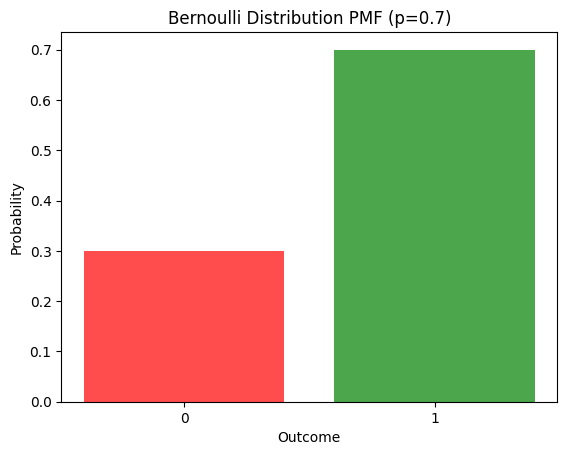

In [26]:
# Bernoulli distribution
# 0.7 probability
bernoulli = dist.Bernoulli((torch.tensor([0.7])))

samples = [bernoulli.sample() for _ in range(100000)]

print(f"Mean: {torch.mean(torch.stack(samples))}")
print(f"Variance: {torch.var(torch.stack(samples))}")
print(f"Standard Deviation: {torch.std(torch.stack(samples))}")

# Note that you can play around with the probability, and also the number of samples to get a different
# result. You will see as the number of samples increase, your probabilities will look more like what 
# you set out
pmf = bernoulli.probs 
plt.bar([0, 1], [1 - bernoulli.probs.item(), bernoulli.probs.item()], color=['red', 'green'], alpha=0.7)
plt.xticks([0, 1])
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution PMF (p=0.7)')
plt.show()

### Normal (Gaussian) Distribution

The normal distribution, also known as the Gaussian distribution, is a continuous probability distribution characterized by its bell-shaped curve. It is defined by two parameters: the mean (μ) and the standard deviation (σ).

#### Key Parameters
- **μ (mu)**: The mean or expectation of the distribution.
- **σ (sigma)**: The standard deviation, which measures the spread or dispersion of the distribution.

#### Probability Density Function (PDF)
The probability density function of a normal distribution is given by:
$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $

#### Important Statistics (Population-Based)  
- **Mean (Expected Value)**: $ \mu = \mathbb{E}[X] $

- **Variance**: $ \sigma^2 = \mathbb{E}[(X - \mu)^2] $

- **Standard Deviation**: $ \sigma = \sqrt{\sigma^2} $

Mean: -0.0028856212738901377
Variance: 1.0036123991012573
Standard Deviation: 1.0018045902252197


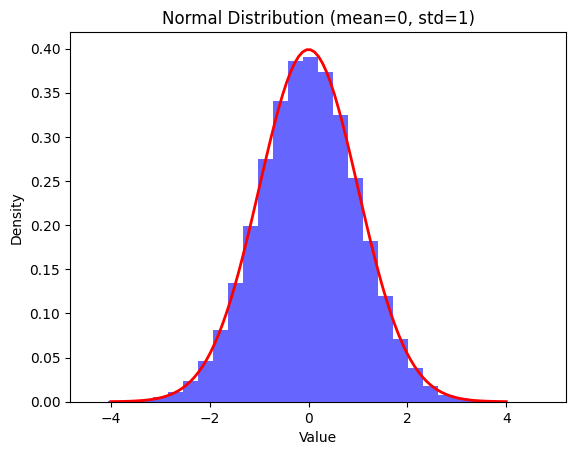

In [ ]:
# Normal distribution
# 0 mean with a 1 as the variance
normal = dist.Normal(torch.tensor([0.0]), torch.tensor([1.0]))

samples = [normal.sample() for _ in range(100000)]

print(f"Mean: {torch.mean(torch.stack(samples))}")
print(f"Variance: {torch.var(torch.stack(samples))}")
print(f"Standard Deviation: {torch.std(torch.stack(samples))}")

# Plot the histogram of the samples
plt.hist(torch.stack(samples).numpy(), bins=30, density=True, alpha=0.6, color='blue')

# Plot the PDF of the normal distribution
x = torch.linspace(-4, 4, 100)
pdf = torch.exp(normal.log_prob(x))
plt.plot(x.numpy(), pdf.numpy(), 'r', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution (mean=0, std=1)')
plt.show()

### Binomial Distribution

The binomial distribution is a discrete probability distribution that describes the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success.

#### Key Parameters
- **n**: The number of trials.
- **p**: The probability of success in each trial.

#### Probability Mass Function (PMF)
The probability mass function of a binomial distribution is given by:
$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $
where:
- $\binom{n}{k}$ is the binomial coefficient, representing the number of ways to choose  $k$ successes from $n$ trials.

#### Important Statistics
- **Mean (Expected Value)**: $ \mu = n \cdot p $
- **Variance**: $ \sigma^2 = n \cdot p \cdot (1 - p) $
- **Standard Deviation**: $ \sigma = \sqrt{n \cdot p \cdot (1 - p)} $

Mean: 5.000100135803223
Variance: 2.4347434043884277
Standard deviation: 1.5603665113449097


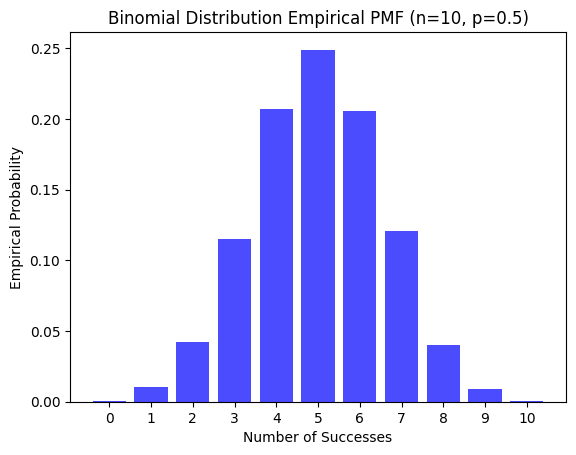

In [34]:
# binomial distribution
# 10 trials with a 0.5 probability of success
binomial = dist.Binomial(10, torch.tensor([0.5]))

samples = torch.stack([binomial.sample() for _ in range(10000)]).squeeze()

print(f"Mean: {torch.mean(samples)}")
print(f"Variance: {torch.var(samples)}")
print(f"Standard deviation: {torch.std(samples)}")

plt.hist(samples.numpy(), bins=range(12), align='left', rwidth=0.8, color='blue', alpha=0.7, density=True)
plt.xlabel('Number of Successes')
plt.ylabel('Empirical Probability')
plt.title('Binomial Distribution Empirical PMF (n=10, p=0.5)')
plt.xticks(range(11))
plt.show()

### Exponential Distribution
The exponential distribution models the time between events in a Poisson point process.

#### Key Parameters
- **λ (lambda)**: Rate parameter (λ > 0)

#### Probability Density Function
$f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$

#### Important Statistics
- **Mean**: $\frac{1}{\lambda}$
- **Variance**: $\frac{1}{\lambda^2}$
- **Standard Deviation**: $\frac{1}{\lambda}$

Mean: 1.0
Variance: 1.0
Standard deviation: 1.0


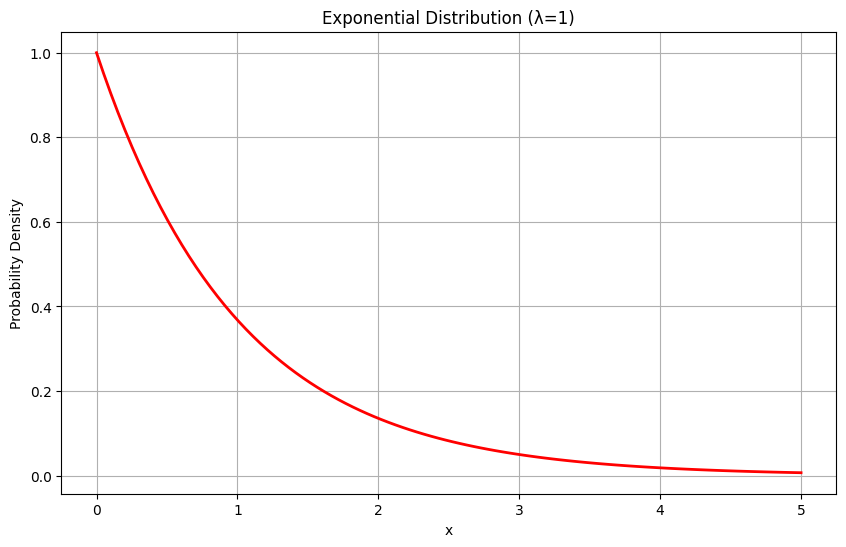

In [35]:
# Exponential distribution with rate parameter lambda = 1
exponential = dist.Exponential(torch.tensor([1.0]))

# Generate samples
x = torch.linspace(0, 5, 100)
pdf = torch.exp(exponential.log_prob(x))

print(f"Mean: {exponential.mean.item()}")
print(f"Variance: {exponential.variance.item()}")
print(f"Standard deviation: {exponential.stddev.item()}")

plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), pdf.numpy(), 'r', linewidth=2)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution (λ=1)')
plt.grid(True)
plt.show()

### Uniform Distribution
The uniform distribution describes a constant probability over an interval.

#### Key Parameters
- **a**: Lower bound
- **b**: Upper bound

#### Probability Density Function
$f(x) = \frac{1}{b-a}$ for $a \leq x \leq b$

#### Important Statistics for Uniform Distribution  

- **Mean (Expected Value)**: $ \mu = \mathbb{E}[X] = \frac{a + b}{2} $

- **Variance**: $ \sigma^2 = \text{Var}(X) = \frac{(b - a)^2}{12} $

- **Standard Deviation**: $ \sigma = \sqrt{\text{Var}(X)} = \frac{b - a}{\sqrt{12}} $

Mean: 2.5
Variance: 2.0833332538604736
Standard deviation: 1.4433757066726685


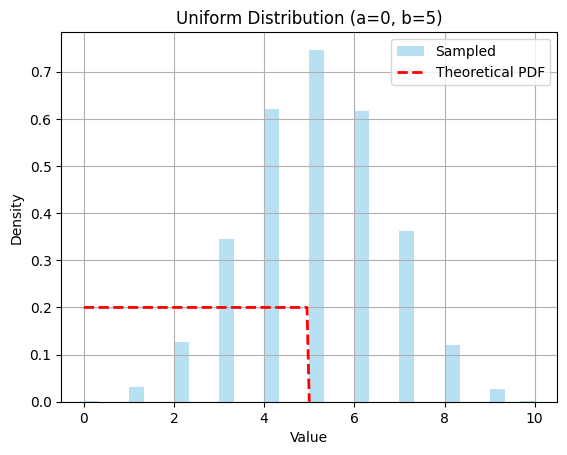

In [40]:
### Uniform Distribution
# Uniform distribution between 0 and 1
uniform = dist.Uniform(torch.tensor([0.0]), torch.tensor([5.0]))

# Generate samples
x = torch.linspace(0, 5, 100)
pdf = torch.exp(uniform.log_prob(x))

print(f"Mean: {uniform.mean.item()}")
print(f"Variance: {uniform.variance.item()}")
print(f"Standard deviation: {uniform.stddev.item()}")

plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', label='Sampled')
plt.plot(x.numpy(), pdf.numpy(), 'r--', linewidth=2, label='Theoretical PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Uniform Distribution (a=0, b=5)')
plt.legend()
plt.grid(True)
plt.show()


For Uniform(a,b):
- Mean: $\frac{a+b}{2}$
- Variance: $\frac{(b-a)^2}{12}$

### Poisson Distribution
The Poisson distribution models the number of events occurring in a fixed interval of time or space.

#### Key Parameters
- **λ (lambda)**: Rate parameter (average number of events)

#### Probability Mass Function
$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$ for $k = 0, 1, 2, ...$

#### Important Statistics 
- **Mean (Expected Value)**: $ \mu = \lambda $
- **Variance**: $ \sigma^2 = \lambda $
- **Standard Deviation**: $ \sigma = \sqrt{\lambda} $

Mean: 1.9299999475479126
Variance: 1.9410409927368164
Standard deviation: 1.3932124376296997


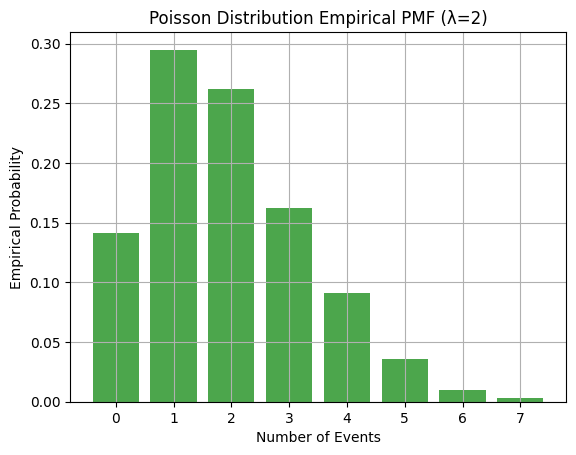

: 

In [ ]:
### Poisson Distribution
# Poisson distribution with rate parameter lambda = 2
poisson = dist.Poisson(torch.tensor([2.0]))

# Generate samples
samples = torch.stack([poisson.sample() for _ in range(1000)]).squeeze()

print(f"Mean: {torch.mean(samples)}")
print(f"Variance: {torch.var(samples)}")
print(f"Standard deviation: {torch.std(samples)}")

# Plot the histogram of the samples (empirical PMF)
max_val = int(samples.max().item()) + 1
plt.hist(samples.numpy(), bins=range(max_val + 1), align='left', rwidth=0.8, color='green', alpha=0.7, density=True)
plt.xlabel('Number of Events')
plt.ylabel('Empirical Probability')
plt.title('Poisson Distribution Empirical PMF (λ=2)')
plt.grid(True)
plt.show()